#### PCA for Supervised Machine Learning
PCA itself is an unsupervised machine learning task. However, it is often used in conjunction with a supervised machine learning model to reduce the dimensions used in the algorithm and therefore improve
speed.

In [14]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [2]:
# Get data
df = pd.read_csv(r"C:\Users\User\github_projects\Machine_Learning_with_Python\datasets\wisconsinBreastCancer.csv", index_col = 'id')
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Drop unnecessary column
# df.drop(columns = 'Unnamed: 32', inplace = True)
# Binarize target column
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
# Save X data
X = df.drop(columns = 'diagnosis')
# Encode our target
y = df['diagnosis']
X.shape

(569, 30)

In [5]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.

scaled_df = scaler.fit_transform(X)

# Instantiate & fit data using PCA
pca = PCA()
pca.fit(scaled_df)

PCA()

By default PCA will return the same number of principal components as the original number of features. Together, these components will explain 100% of the variance, even though they are not the same as
the original features. Note however, that using as many principal components as the number of original features does not serve the purpose of dimensionality reduction! Since our goal is to reduce the
number of features, we have to be willing to give up some information. The goal is to find the appropriate balance where we reduce the number features, but still maintain a high enough proportion of
variance explained.

#### Choosing the Number of Components to Return  
Choosing more principal components will always increase the cumulative amount of variance explained by the components. (The more principal components, the more information we are retaining).
We can visualize the cumulative variance explained by returning more components with the following code:

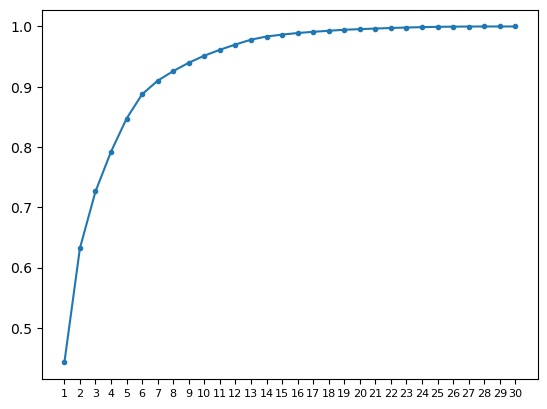

In [6]:
# plot the cumulative sum of the percentage of explained variance for each component and those before it.
plt.plot(range(1, 31), pca.explained_variance_ratio_.cumsum(), marker= '.')
plt.xticks(ticks=range(1,31), fontsize=8);

The graph above shows the cumulative variance explained as the number of principal components returned increases. As you can see, there are dramatic increases in the proportion of explained variance
at first, but this starts to level off as we incrementally add more components. The first principle component will always explain the most variance. Successive components will continue to explain more, but in
order to reduce the number of features, we need to be willing to sacrifice some of this explanation.

Text(0, 0.5, 'Proportion of Explained Variance')

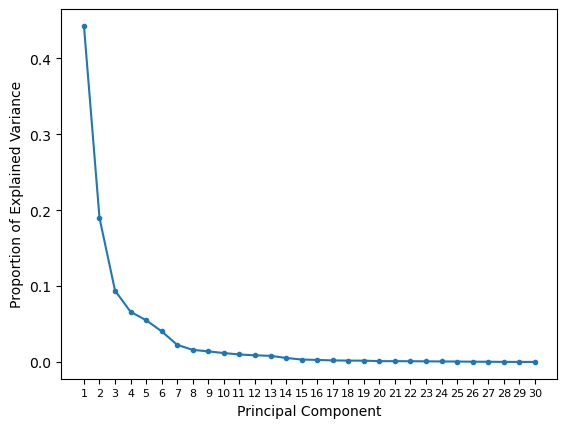

In [7]:
# Plot the explained variance ratios of the first 30 principal components
plt.plot(range(1, 31), pca.explained_variance_ratio_, marker = '.')
plt.xticks(ticks = range(1, 31), fontsize=8)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')

A scree plot conveys the same information as the cumulative plot, but it tracks the contribution of each component separately. As you can see, the first component explains the largest proportion of variance,
and each additional component contributes less and less. Even though this graph is decreasing, remember that increasing the number of components always increases the overall (cumulative) variance
explained.

Elbow method  
Based on the graph above, how many principal components should we keep? The "elbow" or inflection point on the graph above can be seen around 7 principal components. This is where we don't get much benefit from further increasing the number of components, so it represents a good balance.
The code below shows how to specify the number of components to return when you instantiate PCA:

In [8]:
# PCA with 7 components
pca7 = PCA(n_components=7)

### Specifying the Explained Variance  
Rather than specifying the number of components to return, an alternate method is to specify the minimum proportion of explained variance you are willing to accept. PCA will automatically reduce the
number of components just enough to meet your specification.
To specify the proportion of variance, give the n_components argument a float between 0 and 1, and it will return the number of components required to explain the given variance.
The code below is an example of how to ensure that enough components are returned to explain 85% of the variance:

In [9]:
# PCA with 85% explained variance
pca85 = PCA(n_components=.85)

#### Example of PCA with supervised learning
Let's now use the principal components to build a logistic regression model to predict malignant cells.
Split data into training & testing sets

In [11]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

#### Create a PCA pipeline with Standard Scaler
PCA works great in a pipeline to simplify our code and prevent data leakage. Remember we always scale data before applying PCA!
The scree plot above seemed to level off at about 7 components. That's how many we will use in our PCA

In [15]:
# Create a transformer pipeline
transformer = make_pipeline(StandardScaler(), PCA(n_components=7))

In [16]:
# Put the PCA Pipeline in Another Pipeline with a Logistic Regression
logreg = LogisticRegression()
# Create a modeling pipeline
logreg_pipe = make_pipeline(transformer, logreg)
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=7))])),
                ('logisticregression', LogisticRegression())])

In [17]:
# Evaluate model
print('Training accuracy:', logreg_pipe.score(X_train, y_train))
print('Testing accuracy:', logreg_pipe.score(X_test, y_test))

Training accuracy: 0.9812206572769953
Testing accuracy: 0.972027972027972


Summary  
While PCA is, itself, an unsupervised modeling technique, it can be used to prepare data for predictive modeling by reducing the number of features. It can be used in a pipeline along with other
transformers and models. PCA can speed up training time, and will sometimes improve predictions. Data should always be scaled before applying PCA, or any other distance based model. A scree plot
can be used to get a hint about what an optimal number of components may be, but it is not always definitive.